In [1]:
import sys
import os

# Obtener el directorio actual
current_directory = os.getcwd()

# Subir dos niveles al directorio raíz, donde se encuentra la carpeta 'interpretml'
root_path = os.path.abspath(os.path.join(current_directory, '..', '..', '..'))

sys.path.append(root_path)

In [2]:
import pandas as pd
import numpy as np
import interpret
from interpret import show

In [3]:
from interpret.glassbox.nam.wrapper import NAMClassifier

c:\Users\javip\anaconda3\envs\nam\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv').to_numpy().ravel()

X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv').to_numpy().ravel()

In [5]:
model = NAMClassifier(
            num_epochs=50,
            num_learners=5,
            metric='accuracy',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=1,
            random_state=42
        )

model.fit(X_train, y_train)

Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(0):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   2%|▏         | 1/50 [00:00<00:06,  7.63it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   2%|▏         | 1/50 [00:00<00:06,  7.63it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   2%|▏         | 1/50 [00:00<00:06,  7.63it/s] 
                    Training Loss: 3.024 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.054:   2%|▏         | 1/50 [00:00<00:06,  7.63it/s]
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   8%|▊         | 4/50 [00:00<00:02, 16.47it/s]
                    Training Loss: 1.482 |
Epoch(5): 

In [6]:
model.predict(X_test).squeeze()

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [7]:
(model.predict(X_test).squeeze() == y_test).sum() / len(y_test)

0.7207792207792207

In [13]:
model.models[0]

NAM(
  (dropout_layer): Dropout(p=0.05, inplace=False)
  (feature_nns): ModuleList(
    (0): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, out_features=34)
        (1): Linear(in_features=34, out_features=64, bias=True)
        (2): ReLU()
        (3): Linear(in_features=64, out_features=32, bias=True)
        (4): ReLU()
        (5): Linear(in_features=32, out_features=1, bias=False)
      )
    )
    (1): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, out_features=64)
        (1): Linear(in_features=64, out_features=64, bias=True)
        (2): ReLU()
        (3): Linear(in_features=64, out_features=32, bias=True)
        (4): ReLU()
        (5): Linear(in_features=32, out_features=1, bias=False)
      )
    )
    (2): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, 

In [12]:
model.plot(1)

{'x': array([-1.        , -0.997998  , -0.995996  , -0.99399399, -0.99199199,
        -0.98998999, -0.98798799, -0.98598599, -0.98398398, -0.98198198,
        -0.97997998, -0.97797798, -0.97597598, -0.97397397, -0.97197197,
        -0.96996997, -0.96796797, -0.96596597, -0.96396396, -0.96196196,
        -0.95995996, -0.95795796, -0.95595596, -0.95395395, -0.95195195,
        -0.94994995, -0.94794795, -0.94594595, -0.94394394, -0.94194194,
        -0.93993994, -0.93793794, -0.93593594, -0.93393393, -0.93193193,
        -0.92992993, -0.92792793, -0.92592593, -0.92392392, -0.92192192,
        -0.91991992, -0.91791792, -0.91591592, -0.91391391, -0.91191191,
        -0.90990991, -0.90790791, -0.90590591, -0.9039039 , -0.9019019 ,
        -0.8998999 , -0.8978979 , -0.8958959 , -0.89389389, -0.89189189,
        -0.88988989, -0.88788789, -0.88588589, -0.88388388, -0.88188188,
        -0.87987988, -0.87787788, -0.87587588, -0.87387387, -0.87187187,
        -0.86986987, -0.86786787, -0.86586587,

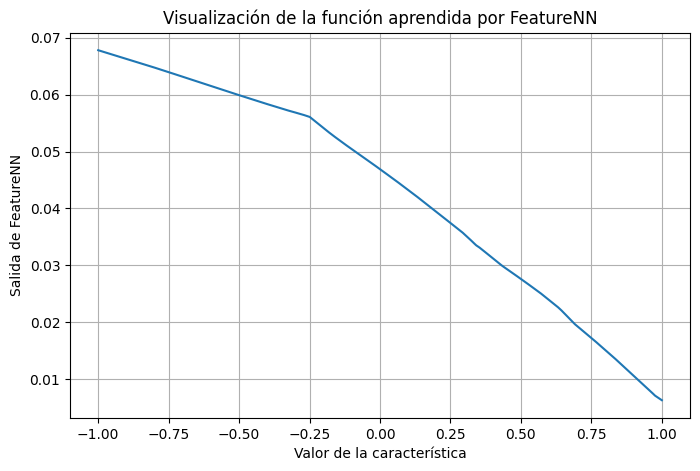

In [31]:
import matplotlib.pyplot as plt

plot = model.plot(2)

x = plot['x']
y = plot['y']
conf_int = plot['conf_int']    

plt.figure(figsize=(8, 5))
plt.plot(x, y)

plt.xlabel("Valor de la característica")
plt.ylabel("Salida de FeatureNN")
plt.title("Visualización de la función aprendida por FeatureNN")
plt.grid(True)

# Mostrar la gráfica
plt.show()

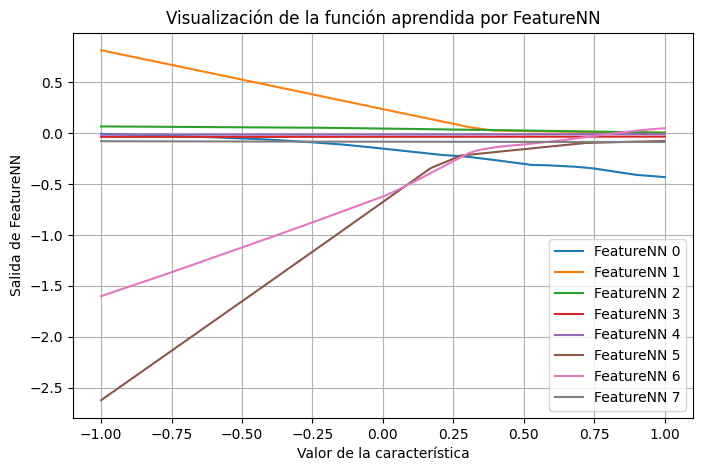

In [29]:
plt.figure(figsize=(8, 5))

for i in range(8):
    plot = model.plot(i)
    x = plot['x']
    y = plot['y']
    conf_int = plot['conf_int']    

    plt.plot(x, y, label=f"FeatureNN {i}")

    plt.xlabel("Valor de la característica")
    plt.ylabel("Salida de FeatureNN")
    plt.title("Visualización de la función aprendida por FeatureNN")
    plt.grid(True)
    plt.legend()

plt.show()